<a href="https://colab.research.google.com/github/jennabittner/ASTRON-5205/blob/main/Project1_Bittner_Holty_Eggenshwiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
### Jenna Bittner, Nathan Holty, Hannah Eggenshwiler


# Imports

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [ ]:
# Import csv file
tab = astropy.io.ascii.read('PS_2025.01.16_06.39.23.csv')

# Explore data

In [ ]:
# Print column names
print('Column names:')
print()
tab.colnames

Column names:



['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [ ]:
# Print discovery method
print('Discovery method:')
print()
np.unique(tab['discoverymethod'])

Discovery method:



<Column name='discoverymethod' dtype='str29' length=11>
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations

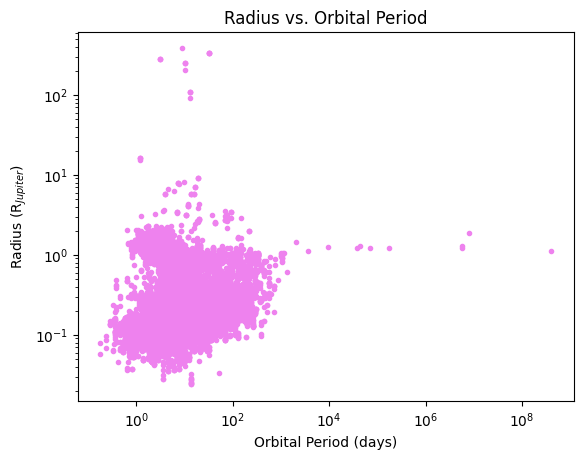

In [ ]:
# Plot radius against period
plt.plot(tab['pl_orbper'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.show()

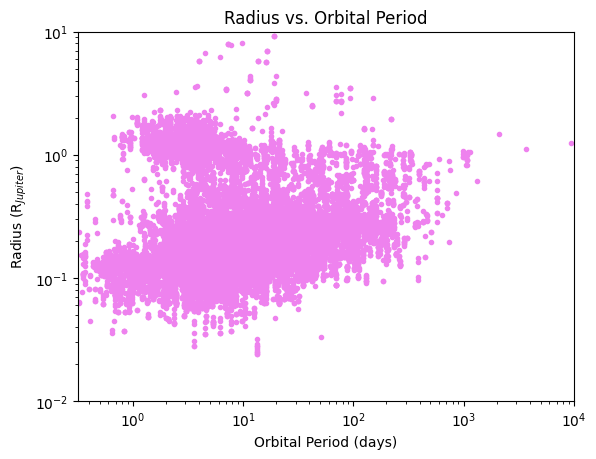

In [ ]:
## Only interested in short orbital periods

# Adjust range
plt.plot(tab['pl_orbper'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**4)
plt.ylim(10**-2, 10**1)
plt.show()

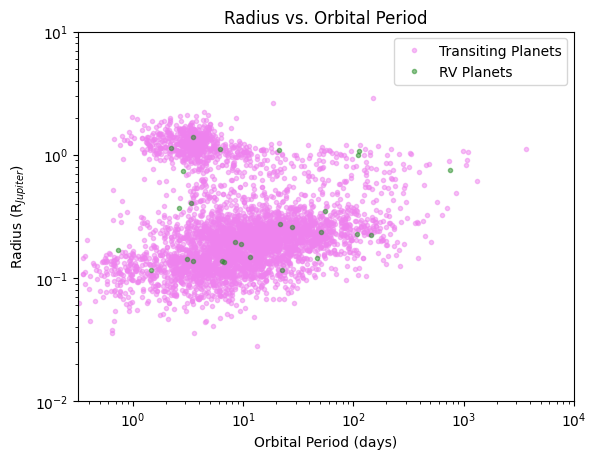

In [ ]:
from posixpath import altsep
## Remove multiple entries from same system

# Planets discovered via transit
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Transit'))
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='violet', label='Transiting Planets', alpha=0.5)

# Planets discovered via radial velocity
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Radial Velocity'))
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='forestgreen', label='RV Planets', alpha=0.5)

# Adjust plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**4)
plt.ylim(10**-2, 10**1)
plt.legend()
plt.show()

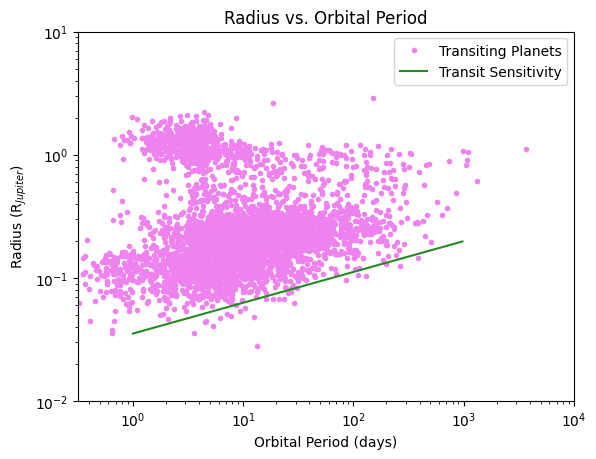

In [ ]:
## Plot transit sensitivity

# Sensitivity equation
p_arr = 10**np.arange(0, 3, 0.01) * u.day  # array of orbital period ranging from 1 to 1000 days
T = 1 * u.year
r_p_arr = np.sqrt(3 * np.sqrt(p_arr / T)) * u.earthRad

# Transiting planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Transit'))

# Plot
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='violet', label='Transiting Planets')
plt.plot(p_arr.to(u.day).value, r_p_arr.to(u.jupiterRad).value, color='forestgreen', label='Transit Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**4)
plt.ylim(10**-2, 10**1)
plt.legend()
plt.show()

# Question 1

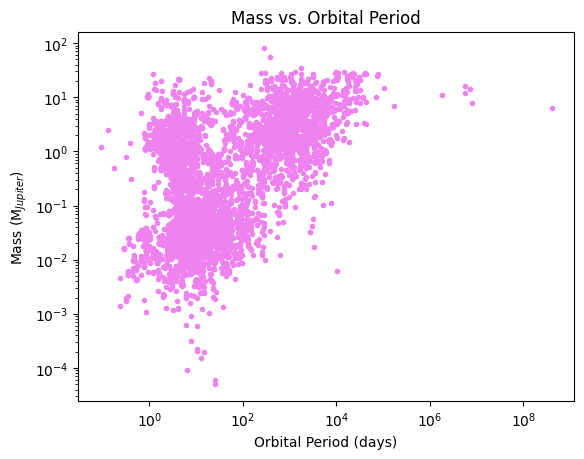

In [ ]:
# Plot mass against period
plt.plot(tab['pl_orbper'], tab['pl_bmassj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (M$_{Jupiter}$)')
plt.title('Mass vs. Orbital Period')
plt.show()

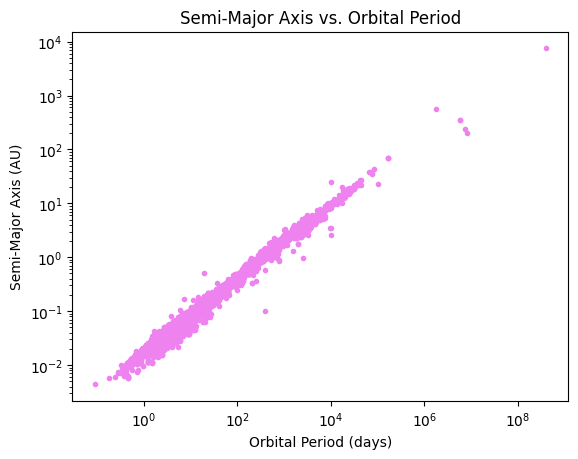

In [ ]:
# Plot semi-major axis against period
plt.plot(tab['pl_orbper'], tab['pl_orbsmax'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Semi-Major Axis (AU)')
plt.title('Semi-Major Axis vs. Orbital Period')
plt.show()

# **HOW DIFFERENT ARE THEY AND WHY?

# Question 2

In [ ]:
## Overplot solar system planets

# Dictionary of solar system planetary data
ss_planet_data = {
    'Mercury': {'period': 88, 'radius': 0.0341, 'mass': 0.000174, 'color': 'grey'},
    'Venus': {'period': 224.7, 'radius': 0.1, 'mass': 0.003, 'color': 'orange'},
    'Earth': {'period': 365.2, 'radius': 0.1, 'mass': 0.003, 'color': 'green'},
    'Mars': {'period': 687, 'radius': 0.0532, 'mass': 0.02, 'color': 'red'},
    'Jupiter': {'period': 4331, 'radius': 1, 'mass': 1, 'color': 'brown'},
    'Saturn': {'period': 10747, 'radius': 0.85, 'mass': 0.299, 'color': 'yellow'},
    'Uranus': {'period': 30589, 'radius': 0.36, 'mass': 0.045, 'color': 'cyan'},
    'Neptune': {'period': 59800, 'radius': 0.35, 'mass': 0.054, 'color': 'blue'}
}

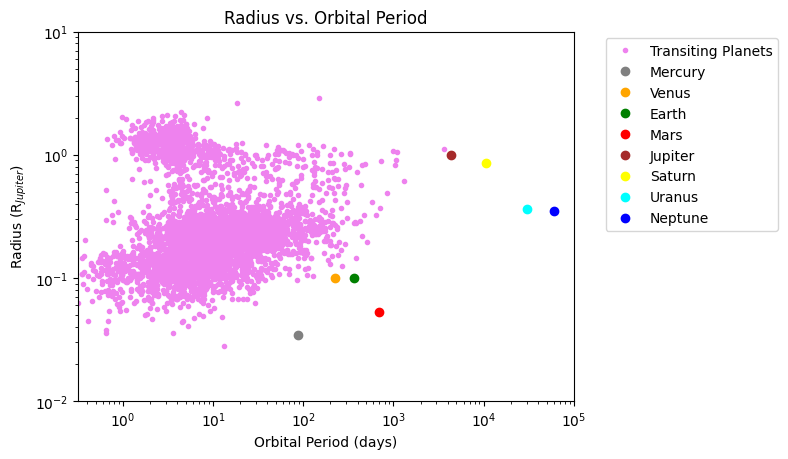

In [ ]:
# Radius against orbital period
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='violet', label='Transiting Planets')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**5)
plt.ylim(10**-2, 10**1)

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

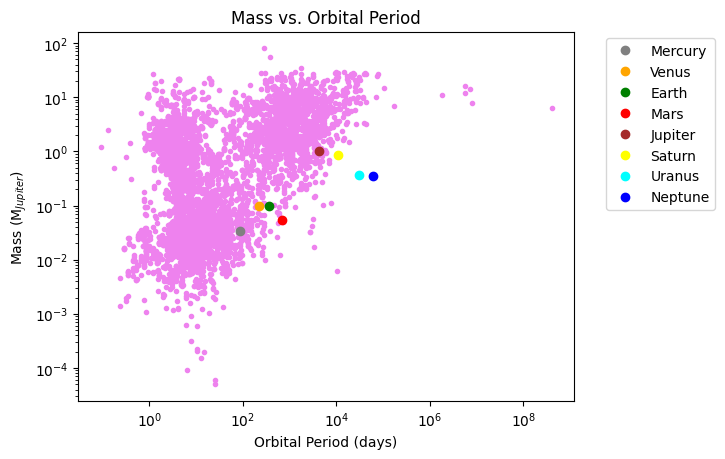

In [ ]:
# Mass against orbital period
plt.plot(tab['pl_orbper'], tab['pl_bmassj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (M$_{Jupiter}$)')
plt.title('Mass vs. Orbital Period')

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

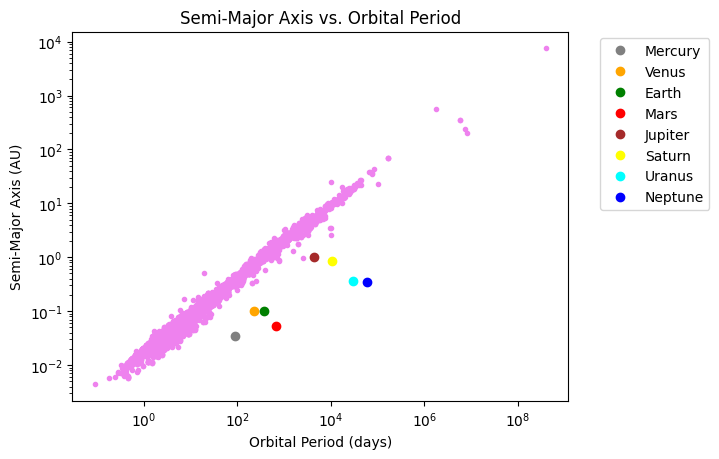

In [ ]:
# Semi-major axis against orbital period
plt.plot(tab['pl_orbper'], tab['pl_orbsmax'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Semi-Major Axis (AU)')
plt.title('Semi-Major Axis vs. Orbital Period')

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Question 3